# Задание №2. Алгоритмы кластеризации

В этом задании вам предлагается попробовать три различных метода кластеризации, чтобы понять, в каких случаях стоит применять те или иные методы.
Проведите кластеризацию предложенных данных следующими методами (используйте пакет sklearn):
1. К-means
2. DBScan
3. Agglomerative clustering

Генерируем два синтетических набора данных для кластеризации. Далее будем тестировать наши алгоритмы на них.

In [5]:
from sklearn.datasets import make_blobs, make_moons, make_swiss_roll
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [6]:
def visualize_clasters(X, labels):
    unique_labels = np.unique(labels)
    unique_colors = np.random.random((len(unique_labels), 3))
    colors = [unique_colors[l] for l in labels]
    plt.figure(figsize=(9, 9))
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.show()

def clusters_statistics(flatten_image, cluster_colors, cluster_labels):
    fig, axes = plt.subplots(3, 2, figsize=(12, 16))
    for remove_color in range(3):
        axes_pair = axes[remove_color]
        first_color = 0 if remove_color != 0 else 2
        second_color = 1 if remove_color != 1 else 2
        axes_pair[0].scatter([p[first_color] for p in flatten_image], [p[second_color] for p in flatten_image], c=flatten_image, marker='.')
        axes_pair[1].scatter([p[first_color] for p in flatten_image], [p[second_color] for p in flatten_image], c=[cluster_colors[c] for c in cluster_labels], marker='.')
        for a in axes_pair:
            a.set_xlim(0, 1)
            a.set_ylim(0, 1)
    plt.show()

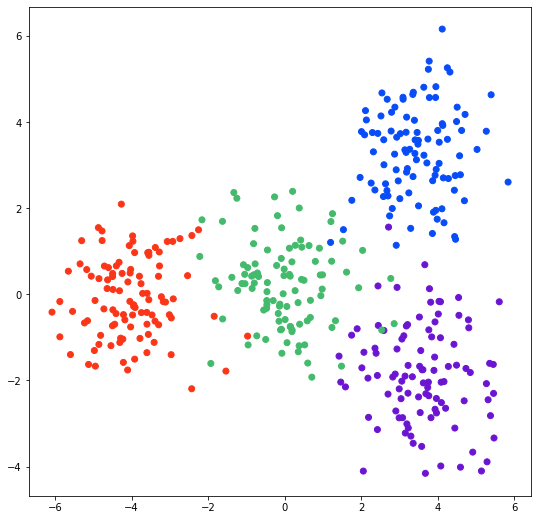

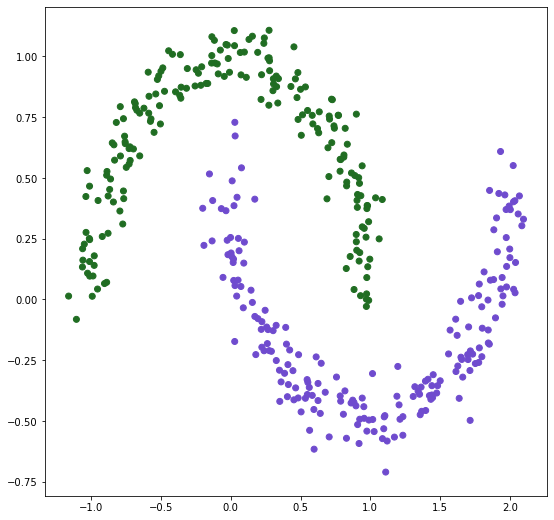

In [7]:
X_1, true_labels = make_blobs(400, 2, centers=[[0, 0], [-4, 0], [3.5, 3.5], [3.5, -2.0]])
visualize_clasters(X_1, true_labels)
X_2, true_labels = make_moons(400, noise=0.075)
visualize_clasters(X_2, true_labels)

Протестируйте алгоритмы на синтетических данных. Подберите гиперпараметры для лучше кластеризации.

In [20]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

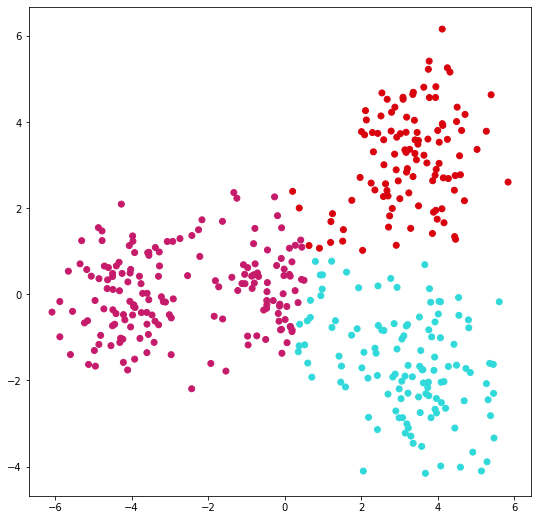

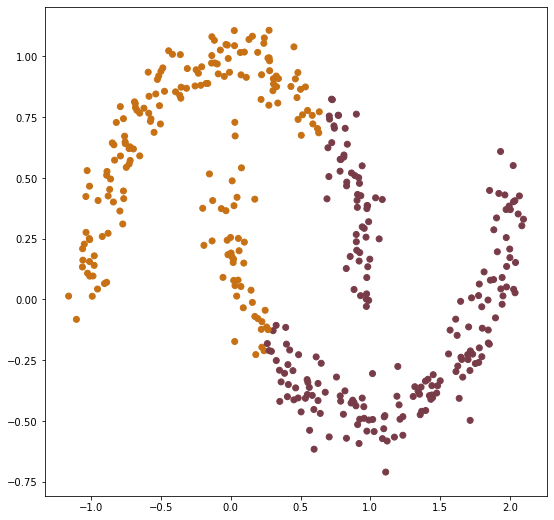

In [37]:
model = KMeans(n_clusters=3)

labels = model.fit_predict(X_1)
visualize_clasters(X_1, labels)

model = KMeans(n_clusters=2)

labels = model.fit_predict(X_2)
visualize_clasters(X_2, labels)

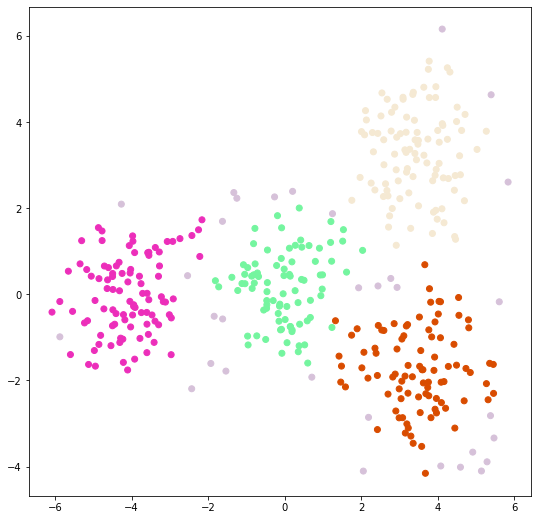

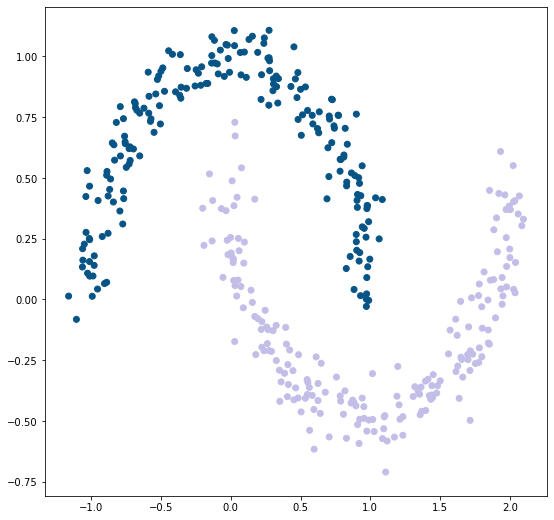

In [67]:
model = DBSCAN(eps=0.655, min_samples=6)

labels = model.fit_predict(X_1)
visualize_clasters(X_1, labels)

model = DBSCAN(eps=0.2)

labels = model.fit_predict(X_2)
visualize_clasters(X_2, labels)

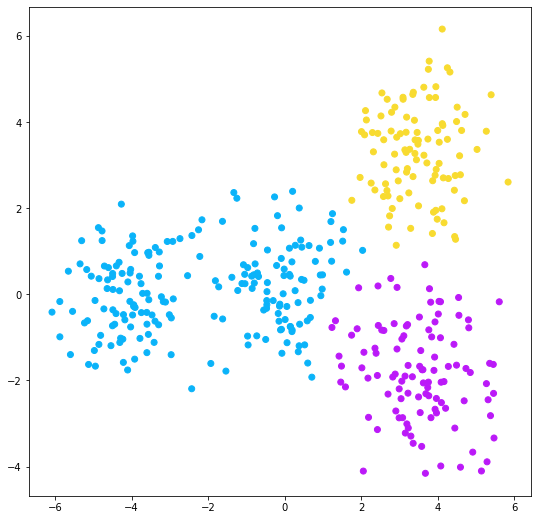

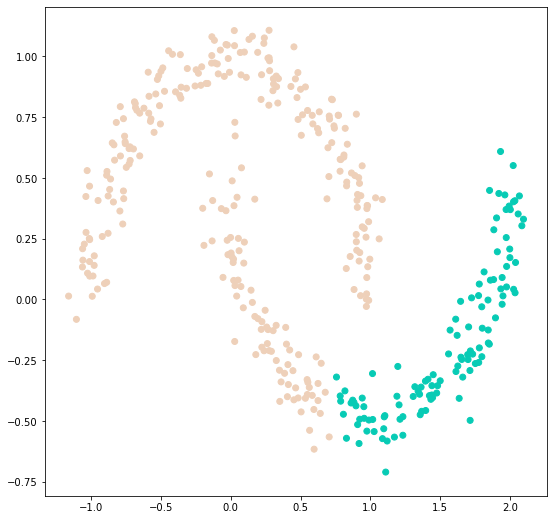

In [72]:
model = AgglomerativeClustering(n_clusters=3)

labels = model.fit_predict(X_1)
visualize_clasters(X_1, labels)

model = AgglomerativeClustering(n_clusters=2)

labels = model.fit_predict(X_2)
visualize_clasters(X_2, labels)